In [24]:
import numpy as np


Загрузить 4-хмерную выборку из файла “VarN.csv”, где N – номер варианта, он же номер в списке подгруппы (см. таблицу с текущим рейтингом). Объем выборки – 400 наблюдений.


In [181]:
import pandas as pd
data = pd.read_csv('/Users/nikita/Documents/Phyton/MSAD/LR-2/var4.csv', sep=';').astype(float)
print(data)

           x1        x2        x3        x4
0   -0.519498 -4.395914  1.180597  1.622535
1    4.267801  0.965116 -1.780448  5.685034
2   -1.027783 -0.441528 -4.121721  1.491985
3    0.068530 -2.515374  3.207351  2.078951
4    2.946923 -1.212327  0.209754  4.760114
..        ...       ...       ...       ...
395  0.734595  0.672218 -1.836336  2.806791
396  1.670725 -2.729719  2.170916  3.148025
397 -1.526875 -0.863970  2.843143  0.635199
398 -5.784181 -0.960284 -1.997865 -3.109446
399 -4.205645 -2.425765 -1.159665 -1.694533

[400 rows x 4 columns]


# Вектор математического ожидания μ

In [26]:
# Математи́ческое ожида́ние — одно из важнейших понятий в теории вероятностей, 
# означающее среднее (взвешенное по вероятностям возможных значений) значение случайной величины

data.mean()

x1   -1.605016
x2    0.224131
x3   -0.011288
x4    0.732349
dtype: float64

# Ковариационная матрица

In [27]:
# Ковариацио́нная ма́трица (или ма́трица ковариа́ций) в 
# теории вероятностей - это матрица, составленная из попарных ковариаций элементов двух случайных векторов.

data.cov()

,x1,x2,x3,x4
x1,9.169633,3.035623,-0.198140,9.155119
x2,3.035623,6.773032,2.124731,3.012900
x3,-0.198140,2.124731,7.008735,-0.284668
x4,9.155119,3.012900,-0.284668,9.549221


In [28]:
# DataFrame.corr(method='pearson', min_periods=1)

data.corr(method = 'pearson')

,x1,x2,x3,x4
x1,1.000000,0.385195,-0.024716,0.978372
x2,0.385195,1.000000,0.308385,0.374636
x3,-0.024716,0.308385,1.000000,-0.034796
x4,0.978372,0.374636,-0.034796,1.000000


(x1, x2) - значение позволяет утверждать, что между величинами слабая прямая связь

(x1, x3) - значение позволяет утверждать, что между величинами практически нет связи (ковариации х1 и х3 близки к 0)

(x1, x4) - значение позволяет утверждать, что величины практически линйено зависимы.

(х2, х3) - значение позволяет утверждать, что между величинами слабая прямая связь

(х2, х4) - значение позволяет утверждать, что между величинами слабая прямая связь

(х3, х4) - значение позволяет утверждать, что между величинами практически нет связи (ковариации х3 и х4 близки к 0)

Постройте гистограммы для каждой переменной из выборки. Похожи ли
гистограммы на плотность распределения нормального закона?

In [29]:
import matplotlib.pyplot as plt

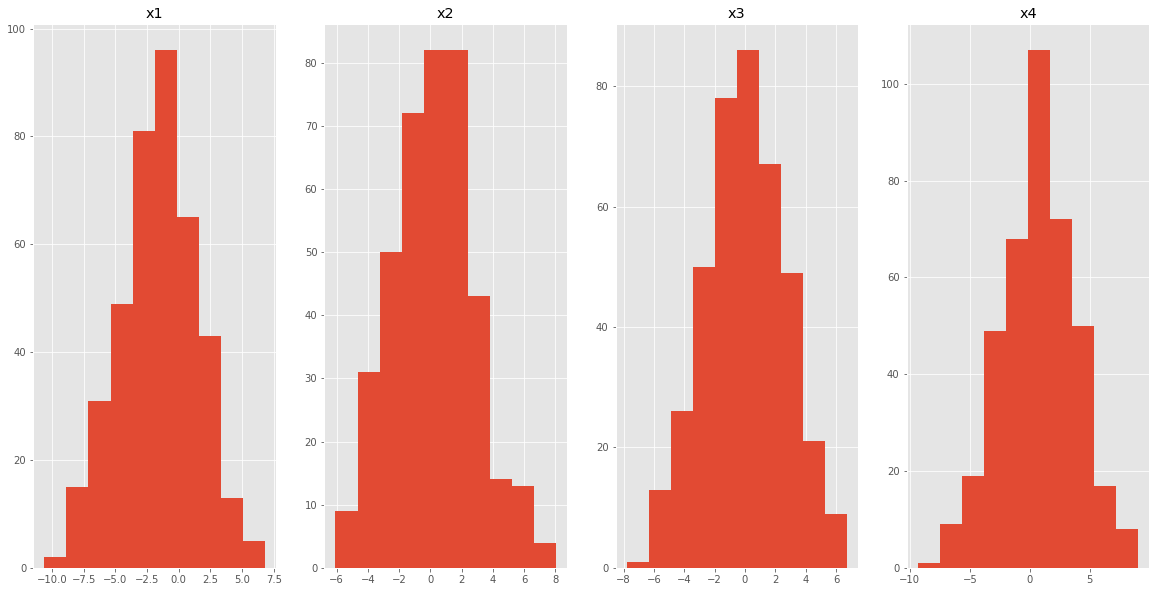

In [249]:
_, axs = plt.subplots(1, 4, figsize=(20, 10))
for i in range(1, 5):
    axs[i - 1].hist(data["x" + str(i)])
    axs[i - 1].title.set_text("x" + str(i))

In [31]:
from scipy import stats

In [147]:
for col in data.columns:
    print(col, " -- ", stats.shapiro(data[col]))

x1  --  ShapiroResult(statistic=0.9978688359260559, pvalue=0.8977496027946472)
x2  --  ShapiroResult(statistic=0.9952171444892883, pvalue=0.2563396394252777)
x3  --  ShapiroResult(statistic=0.9962748885154724, pvalue=0.47610238194465637)
x4  --  ShapiroResult(statistic=0.9977723956108093, pvalue=0.8776838183403015)


In [146]:
for col in data.columns:
    print(col, " -- ", stats.normaltest(data[col]))

x1  --  NormaltestResult(statistic=0.3313664192948335, pvalue=0.8473146127722113)
x2  --  NormaltestResult(statistic=1.908135443094133, pvalue=0.385171063904165)
x3  --  NormaltestResult(statistic=1.9790801613229756, pvalue=0.3717476256330406)
x4  --  NormaltestResult(statistic=0.5036381561584666, pvalue=0.7773853714013061)


In [246]:
# for col in data.columns:
#    print(col, " -- ", stats.contingency(data[col]))

# Эллипсы концентрации

In [80]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

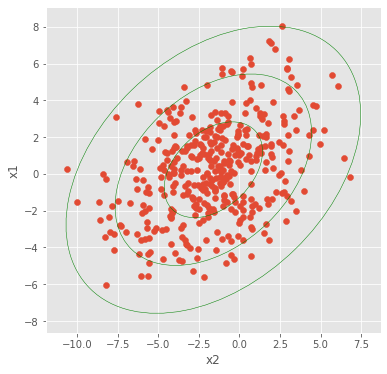

In [252]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x = data['x1'], y = data['x2'])
plt.xlabel("x2")
plt.ylabel("x1")

confidence_ellipse(data['x1'], data['x2'], ax, edgecolor="green", n_std=1)
confidence_ellipse(data['x1'], data['x2'], ax, edgecolor="green", n_std=2)
confidence_ellipse(data['x1'], data['x2'], ax, edgecolor="green", n_std=3)

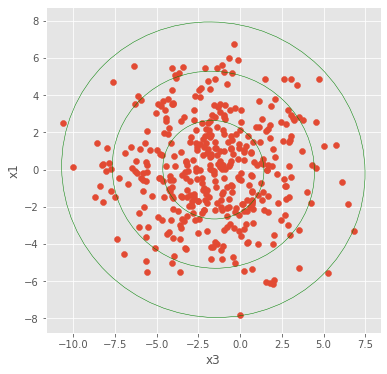

In [250]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x = data['x1'], y = data['x3'])
plt.xlabel("x3")
plt.ylabel("x1")

confidence_ellipse(data['x1'], data['x3'], ax, edgecolor="green", n_std=1)
confidence_ellipse(data['x1'], data['x3'], ax, edgecolor="green", n_std=2)
confidence_ellipse(data['x1'], data['x3'], ax, edgecolor="green", n_std=3)

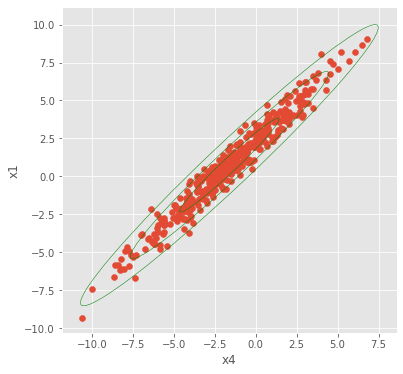

In [251]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x = data['x1'], y = data['x4'])
plt.xlabel("x4")
plt.ylabel("x1")

confidence_ellipse(data['x1'], data['x4'], ax, edgecolor="green", n_std=1)
confidence_ellipse(data['x1'], data['x4'], ax, edgecolor="green", n_std=2)
confidence_ellipse(data['x1'], data['x4'], ax, edgecolor="green", n_std=3)

# Линейные преобразования

In [ ]:
# Y = CX, 
# C = (6 0 6 0)
#     (0 3 0 6) - матрица полного ранга, следовательно Y имеет нормальное распределение

# Смесь распределений

In [253]:
p = 0.3
x5 = p * data['x1'] + (1 - p) * data['x2']

meanS = x5.mean()

print("МО =", meanS)

varS = (p * data['x1']**2 + (1 - p) * data['x2']**2).mean() - meanS**2

print("Дисперсия =", varS)

МО = -0.32461279042944946
Дисперсия = 8.175896478960254


(array([ 3., 22., 37., 57., 94., 88., 52., 29., 11.,  7.]),
 array([-6.71132053, -5.39871388, -4.08610723, -2.77350058, -1.46089393,
        -0.14828727,  1.16431938,  2.47692603,  3.78953268,  5.10213933,
         6.41474598]),
 <BarContainer object of 10 artists>)

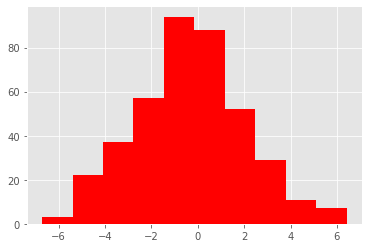

In [264]:
plt.hist(p * data['x1'] + (1 - p) * data['x2'],  color = 'red')